For validation purposes, in this notebook I reproduce the most relevant figures in the steady VLM chapter of "Low Speed Aerodynamics", 2nd Edition by Katz & Plotkin.

In [1]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from Steady_VLM import Steady_VLM

import time
start = time.time()

In [2]:
sim = Steady_VLM()

# FIGURE 12.21
For this figure, AR = 4 does not correspond to the planform, it's the "real" wingspan, so we need to project onto the plane with cos(delta)

In [3]:
deltas = np.array([-45,-30,-15,0,15,30])*np.pi/180
m, n = 8,30
T = 0*np.pi/180
c_r, c_t = 1,1
U_i = 100
rho = 1.0
alpha = 1*np.pi/180

In [4]:
sim.set_flight_conditions(U_i,alpha,rho)
sim.set_mesh_parameters(m,n)

CLa_list = list()
for delta in deltas:
    bp = 4*np.cos(delta)
    sim.set_wing_parameters(bp,T,delta,c_r,c_t)
    sim.run()
    CLa_list.append(sim.cl_wing/alpha*np.cos(delta))

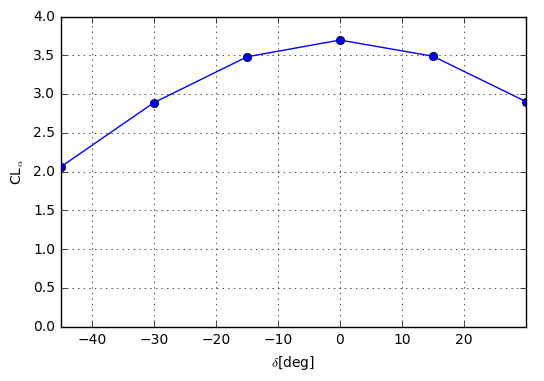

In [5]:
plt.plot(deltas*180/np.pi,CLa_list,'o-')
plt.xlabel(r'$\delta$[deg]')
plt.ylabel(r'CL$_\alpha$')
plt.ylim(0,4)
plt.grid()
plt.xlim(deltas.min()*180/np.pi,deltas.max()*180/np.pi);

# Figure 12.19

In [6]:
bp = 7.28
c_ts = np.array([0.4,0.6,1])
m, n = 15,80
delta = 0*np.pi/180
T = 0*np.pi/180
c_r = 1
U_i = 100
rho = 1.0
alpha = 1*np.pi/180

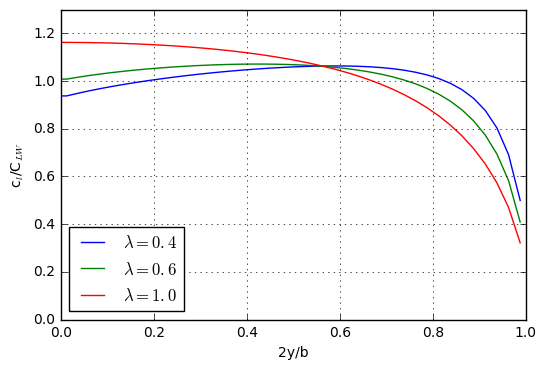

In [7]:
sim.set_flight_conditions(U_i,alpha,rho)
sim.set_mesh_parameters(m,n)

cl_span_list = list()
for c_t in c_ts:
    sim.set_wing_parameters(bp,T,delta,c_r,c_t)
    sim.run()
    x, y = sim.get_normalized_spanwise_cl()
    plt.plot(x,y)
    
plt.legend([r'$\lambda=0.4$',r'$\lambda=0.6$',r'$\lambda=1.0$'],
           loc='best')
plt.xlabel('2y/b')
plt.ylabel(r'c$_l$/C$_{LW}$')
plt.xlim(0,1)
plt.ylim(0,1.3)
plt.grid();

# Figure 12.17

In [8]:
bp = 4
m, n = 15,60
delta = 0*np.pi/180
thetas = np.array([0,45,135])*np.pi/180
c_r, c_t= 1, 1
U_i = 100
rho = 1.0
alpha = 1*np.pi/180

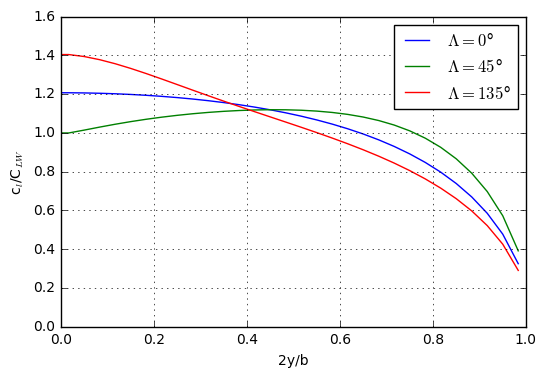

In [9]:
sim.set_flight_conditions(U_i,alpha,rho)
sim.set_mesh_parameters(m,n)

cl_span_list = list()
for T in thetas:
    sim.set_wing_parameters(bp,T,delta,c_r,c_t)
    sim.run()
    x, y = sim.get_normalized_spanwise_cl()
    plt.plot(x,y)
    
plt.legend([r'$\Lambda=0$°',r'$\Lambda=45$°',r'$\Lambda=135$°'],loc='best')
plt.xlabel('2y/b')
plt.ylabel(r'c$_l$/C$_{LW}$')
plt.xlim(0,1)
plt.ylim(0,1.6)
plt.grid();

# Figure 12.16

In [10]:
bps = np.linspace(0.2,7,num=20)
thetas = np.array([0,30,45,60])*np.pi/180
m, n = 8,30
delta = 0*np.pi/180
c_r, c_t= 1, 1
U_i = 100
rho = 1.0
alpha = 1*np.pi/180

In [11]:
sim.set_flight_conditions(U_i,alpha,rho)
sim.set_mesh_parameters(m,n)

CLa = list()
for T in thetas:
    for bp in bps:
        sim.set_wing_parameters(bp,T,delta,c_r,c_t)
        sim.run()
        CLa.append(sim.cl_wing/alpha)

In [12]:
CLa = np.array(CLa).reshape(thetas.size,bps.size)

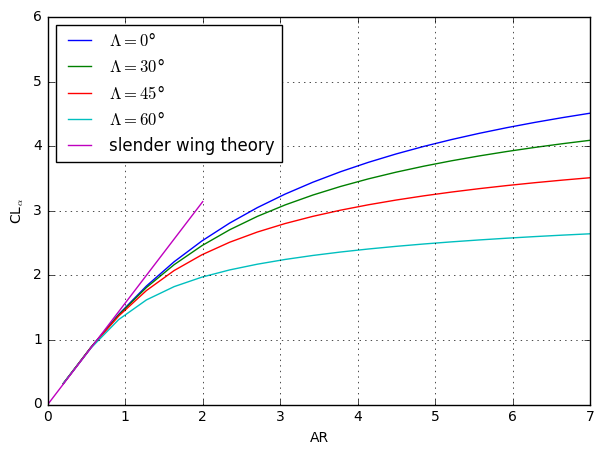

In [13]:
plt.figure(figsize=(7,5))
for i in range(thetas.size):
    plt.plot(bps,CLa[i,:])
xth = np.linspace(0,2)
plt.plot(xth,xth*np.pi/2)
plt.legend([r'$\Lambda=0$°',r'$\Lambda=30$°',r'$\Lambda=45$°',r'$\Lambda=60$°','slender wing theory'],loc='best')
plt.grid()
plt.ylabel(r'CL$_\alpha$')
plt.xlabel('AR')
plt.ylim(0,6);

When AR tends to $\infty$, CL$_\alpha$ should tend to $2\pi$ (with no sweep):

In [14]:
bp = 10000
c_list = list()
for T in thetas:
    sim.set_wing_parameters(bp,T,delta,c_r,c_t)
    sim.run()
    c_list.append(sim.cl_wing/alpha)

import pandas as pd
pd.DataFrame({'sweep [deg]': thetas*180/np.pi, 'CL_alpha': np.array(c_list)})

,CL_alpha,sweep [deg]
0,6.281181,0.0
1,5.439920,30.0
2,4.441876,45.0
3,3.141052,60.0


In [15]:
print('Execution time: %0.2f s' % (time.time() - start))

Execution time: 22.93 s
